In [1]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [3]:
xs_train, ys_train = datasets.load_svmlight_file('./a9a.csv', n_features=123)
xs_val, ys_val = datasets.load_svmlight_file('./a9a_t.csv', n_features=123)

xs_train = xs_train.A # numpy
xs_val = xs_val.A

xs_train = np.c_[xs_train, np.ones(len(xs_train))] # + 1
xs_val = np.c_[xs_val, np.ones(len(xs_val))]

ys_train = [0 if y == -1 else 1 for y in ys_train] # {-1, 1} -> {0, 1}
ys_val = [0 if y == -1 else 1 for y in ys_val]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
# 交叉熵
def getLoss(xs, ys):
    loss = 0
    grad = 0
    for x, y in zip(xs, ys):
        y_calc = sigmoid(W.T.dot(x))
        loss += y * np.log(y_calc) + (1 - y) * np.log(1 - y_calc)
        grad += (y - y_calc) * x
    loss = - loss / len(xs)
    grad = - grad.reshape(-1, 1) / len(xs)
    return loss, grad

# 接受率
def getAcc(xs, ys):
    acc = 0
    for x, y in zip(xs, ys):
        y_calc = W.T.dot(x)
        y_calc = 1 if y_calc >= 0.5 else 0
        if (y == y_calc):
            acc += 1 
    acc /= len(xs)
    return acc

$$
\hat{y_i} = \sigma(W^Tx_i) \\
Loss = - \frac 1 {\#x} \sum_{i = 0}^{\#x}[y_i\log(\hat{y_i}) + (1 - y_i)\log(1 - \hat{y_i})] \\
\frac {\partial Loss} {\partial W} = - \frac 1 {\#x} \sum_{i = 0}^{\#x}(y - \hat{y_i}) * x_i
$$

In [17]:
W = np.random.random([123 + 1, 1])

losses_train, losses_val = [], []
acc_val = []

batch_size = 100 # 每一批次大小

epoches = 100
batches = len(xs_train) // batch_size

for epoch in range(epoches):
    for batch in range(batches):
        s = batch * batch_size
        e = s + batch_size
        
        loss_train, grad = getLoss(xs_train[s:e], ys_train[s:e])
        W = W - lr * grad # SGD
        
    loss_val, _ = getLoss(xs_val, ys_val)
    losses_train.append(loss_train)
    losses_val.append(loss_val)
    acc = getAcc(xs_val, ys_val)
    acc_val.append(acc)
    
    print("epoch ", epoch, "loss_train: ", loss_train, "loss_val: ", loss_val, "acc_val: ", acc)

epoch  0 loss_train:  [5.62667086] loss_val:  [5.60660679] acc_val:  0.23622627602727106
epoch  1 loss_train:  [5.14184287] loss_val:  [5.12436237] acc_val:  0.23622627602727106
epoch  2 loss_train:  [4.65834476] loss_val:  [4.64345025] acc_val:  0.23622627602727106
epoch  3 loss_train:  [4.17733565] loss_val:  [4.16502171] acc_val:  0.23622627602727106
epoch  4 loss_train:  [3.70095338] loss_val:  [3.69119123] acc_val:  0.23622627602727106
epoch  5 loss_train:  [3.23304127] loss_val:  [3.22574272] acc_val:  0.23622627602727106
epoch  6 loss_train:  [2.78017522] loss_val:  [2.77511978] acc_val:  0.23622627602727106
epoch  7 loss_train:  [2.35264223] loss_val:  [2.34935747] acc_val:  0.2362876973158897
epoch  8 loss_train:  [1.96424855] loss_val:  [1.96187833] acc_val:  0.24181561329156687
epoch  9 loss_train:  [1.62938399] loss_val:  [1.62665825] acc_val:  0.2712364105398931
epoch  10 loss_train:  [1.35755365] loss_val:  [1.35298415] acc_val:  0.3349302868374178
epoch  11 loss_train:  

epoch  93 loss_train:  [0.45205847] loss_val:  [0.43153106] acc_val:  0.7909833548307843
epoch  94 loss_train:  [0.45099668] loss_val:  [0.43070984] acc_val:  0.7913518825624961
epoch  95 loss_train:  [0.44995158] loss_val:  [0.42990161] acc_val:  0.7916589890055893
epoch  96 loss_train:  [0.44892278] loss_val:  [0.42910608] acc_val:  0.791536146428352
epoch  97 loss_train:  [0.44790991] loss_val:  [0.42832294] acc_val:  0.7918432528714452
epoch  98 loss_train:  [0.44691261] loss_val:  [0.4275519] acc_val:  0.7919660954486825
epoch  99 loss_train:  [0.44593051] loss_val:  [0.42679267] acc_val:  0.7920275167373011


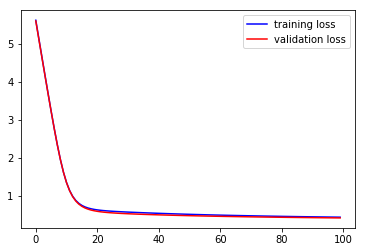

In [26]:
plt.plot([i for i in range(len(losses_train))], losses_train, 'b')
plt.plot([i for i in range(len(losses_val))], losses_val, 'r')
plt.legend(["training loss","validation loss"])
plt.savefig('./lab_2_1_1.pdf')
plt.show()

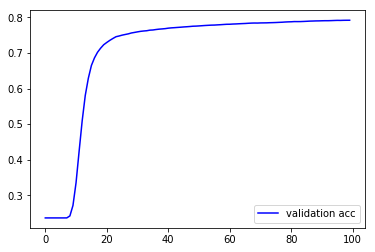

In [27]:
plt.plot([i for i in range(len(acc_val))], acc_val, 'b')
plt.legend(["validation acc"])
plt.savefig('./lab_2_1_2.pdf')
plt.show()